In [2]:
import numpy as np
import pandas as pd

In [3]:
#importind the csv files
real_news = pd.read_csv('True.csv')
fake_news = pd.read_csv('Fake.csv')

In [5]:
#importind the csv files
print(real_news.head())
print(fake_news.head())

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   
                                               title  \
0   Donald Trump Sends Out Embarrassing Ne

In [6]:
real_news.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [7]:
fake_news.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [9]:
real_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [10]:
fake_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

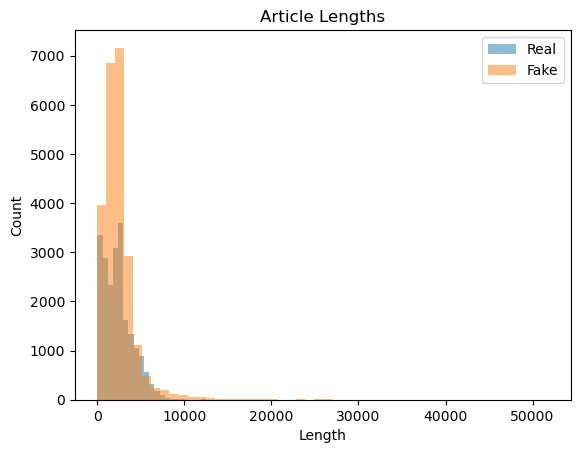

In [11]:
import matplotlib.pyplot as plt

real_lengths = real_news['text'].apply(len)
fake_lengths = fake_news['text'].apply(len)

plt.hist(real_lengths, bins=50, alpha=0.5, label='Real')
plt.hist(fake_lengths, bins=50, alpha=0.5, label='Fake')
plt.title('Article Lengths')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()

In [12]:
from collections import Counter
import nltk

In [14]:
#downloading stopwords and punkt
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\heman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
def get_most_common_words(texts, num_words=10):
    all_words = []
    for text in texts:
        all_words.extend(nltk.word_tokenize(text.lower()))
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in all_words if word.isalpha() and word not in stop_words]
    word_counts = Counter(words)
    return word_counts.most_common(num_words)

In [16]:
real_words = get_most_common_words(real_news['text'])
fake_words = get_most_common_words(fake_news['text'])


In [17]:
print('Real News:', real_words)
print('Fake News:', fake_words)

Real News: [('said', 99037), ('trump', 54249), ('would', 31526), ('reuters', 28412), ('president', 26397), ('state', 19728), ('government', 18288), ('new', 16784), ('house', 16519), ('states', 16515)]
Fake News: [('trump', 74241), ('said', 31149), ('people', 26015), ('president', 25772), ('would', 23461), ('one', 22995), ('clinton', 18085), ('obama', 17920), ('like', 17660), ('donald', 17235)]


In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

In [19]:
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\heman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation and digits
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]
     # Stem or lemmatize the words
    words = [stemmer.stem(word) for word in words]
   
        # Join the words back into a string
    text = ' '.join(words)

    return text


In [21]:
real_news['text'] = real_news['text'].apply(preprocess_text)
fake_news['text'] = fake_news['text'].apply(preprocess_text)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse as sp
import numpy as np
vectorizer = CountVectorizer()
X_real = vectorizer.fit_transform(real_news['text'])
X_fake = vectorizer.transform(fake_news['text'])

X = sp.vstack([X_real, X_fake])
y = np.concatenate([np.ones(X_real.shape[0]), np.zeros(X_fake.shape[0])])

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

c:\Users\heman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)



Accuracy: 0.994988864142539
Precision: 0.9935498733010827
Recall: 0.9960739030023095
F1 Score: 0.9948102871641102


In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# Define a function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Predict the labels for the testing data
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print the evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
# Train and evaluate a Multinomial Naive Bayes model
print("Training and evaluating Multinomial Naive Bayes model...")
nb = MultinomialNB()
train_and_evaluate_model(nb, X_train, y_train, X_test, y_test)
print()

# Train and evaluate a Support Vector Machine model
print("Training and evaluating Support Vector Machine model...")
svm = SVC()
train_and_evaluate_model(svm,  X_train, y_train, X_test, y_test)

Training and evaluating Multinomial Naive Bayes model...
Accuracy: 0.9422
Precision: 0.9422
Recall: 0.9422
F1-score: 0.9422

Training and evaluating Support Vector Machine model...
Accuracy: 0.9919
Precision: 0.9919
Recall: 0.9919
F1-score: 0.9919


In [33]:
from sklearn.model_selection import GridSearchCV

# Define a list of hyperparameters to search over
hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(LogisticRegression(), hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and test accuracy
print('Best hyperparameters:', grid_search.best_params_)
print('Test accuracy:', grid_search.score(X_test, y_test))

c:\Users\heman\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\heman\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\heman\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\heman\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\heman\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\heman\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Best hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Test accuracy: 0.9953229398663697


In [34]:
from joblib import dump

dump(clf, 'model.joblib')
dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']

In [36]:
from flask import Flask, request, render_template
from joblib import load
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string


In [37]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()